# STA130 Week 03 Homework
***
#### **Author**: David Daniliuc<br>**Created**: Fri Sept. 20, 2024

#### Homework Chat Logs:
- Question 1-2: *https://chatgpt.com/share/66f1b3d0-c534-8004-9528-880a6bc306a7*

- Question 3: *https://chatgpt.com/share/66f1b85d-b32c-8004-aa12-0fe5d8e58a24*

- Question 5: *https://chatgpt.com/share/66f1cae1-2a0c-8004-97ea-3f2a02552611*


### 1. Use *fig.add_[h/v]line()* and *fig.add_[h/v]rect()* to mark, respspectively, location (mean and median) and scale (range, interquartile range, and a range defined by two standard deviations away from the mean in both directions) of *flipper_length_mm* for each _species_ onto _plotly_ histograms of *flipper_length_mm* for each _species_ in the penguins dataset.

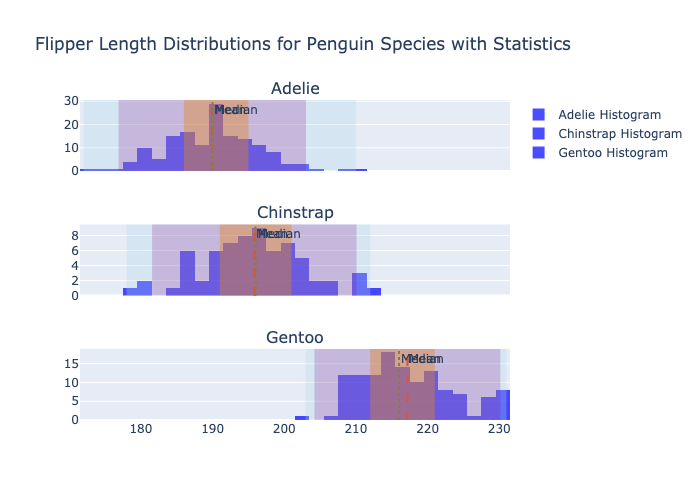

In [6]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load penguins dataset
penguins = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

# Drop rows with missing values for simplicity
penguins = penguins.dropna(subset=["flipper_length_mm"])

# List of species
species_list = penguins['species'].unique()

# Initialize subplots for each species
fig = make_subplots(rows=len(species_list), cols=1, shared_xaxes=True, subplot_titles=species_list)

# Loop through each species
for i, species in enumerate(species_list):
    df_species = penguins[penguins['species'] == species]
    flipper_lengths = df_species['flipper_length_mm']
    
    # Calculate statistics
    mean = flipper_lengths.mean()
    median = flipper_lengths.median()
    min_flipper = flipper_lengths.min()
    max_flipper = flipper_lengths.max()
    iqr = flipper_lengths.quantile(0.75) - flipper_lengths.quantile(0.25)
    std = flipper_lengths.std()
    
    # Create histogram for flipper_length_mm
    hist = go.Histogram(x=flipper_lengths, nbinsx=20, name=f'{species} Histogram', marker_color='blue', opacity=0.7)
    
    # Add histogram to subplot
    fig.add_trace(hist, row=i+1, col=1)
    
    # Add mean and median lines
    fig.add_vline(x=mean, line=dict(color='red', dash='dash'), annotation_text='Mean', row=i+1, col=1)
    fig.add_vline(x=median, line=dict(color='green', dash='dot'), annotation_text='Median', row=i+1, col=1)
    
    # Add range (min to max)
    fig.add_vrect(x0=min_flipper, x1=max_flipper, fillcolor="lightblue", opacity=0.3, line_width=0, row=i+1, col=1)
    
    # Add interquartile range (IQR)
    fig.add_vrect(x0=flipper_lengths.quantile(0.25), x1=flipper_lengths.quantile(0.75), fillcolor="orange", opacity=0.4, line_width=0, row=i+1, col=1)
    
    # Add 2 standard deviations range
    fig.add_vrect(x0=mean - 2*std, x1=mean + 2*std, fillcolor="purple", opacity=0.2, line_width=0, row=i+1, col=1)

# Update layout
fig.update_layout(title='Flipper Length Distributions for Penguin Species with Statistics')
fig.show(renderer="png")

### 2. Transition your ChatBot session from the previous problem to repeat the previous problem, but this time using _seaborn_ **kernel density estimation** (KDE) plots to produce the desired figures organized in row of three plots.

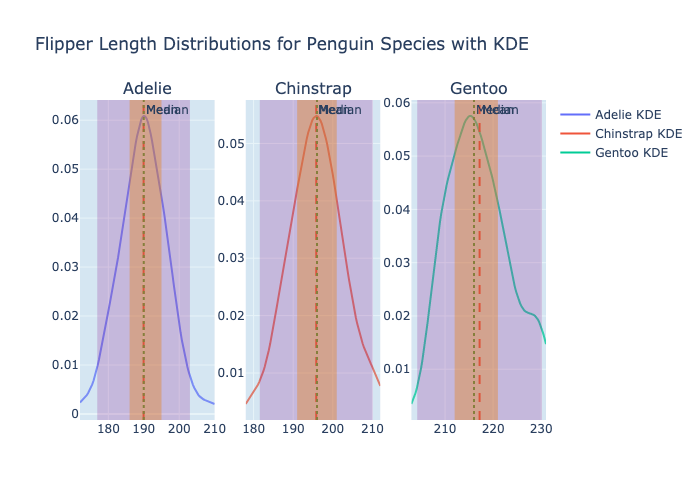

In [13]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import gaussian_kde

# Load penguins dataset
penguins = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

# Drop rows with missing values for simplicity
penguins = penguins.dropna(subset=["flipper_length_mm"])

# List of species
species_list = penguins['species'].unique()

# Set up figure for 3 subplots in a row
fig = make_subplots(rows=1, cols=3, subplot_titles=species_list)

# Loop through each species and create KDE plots
for i, species in enumerate(species_list):
    df_species = penguins[penguins['species'] == species]
    flipper_lengths = df_species['flipper_length_mm']
    
    # Calculate KDE
    kde = gaussian_kde(flipper_lengths)
    x = np.linspace(flipper_lengths.min(), flipper_lengths.max(), 100)
    kde_values = kde(x)

    # Create KDE plot
    fig.add_trace(go.Scatter(x=x, y=kde_values, mode='lines', name=f'{species} KDE', line=dict(width=2)), row=1, col=i+1)
    
    # Calculate statistics
    mean = flipper_lengths.mean()
    median = flipper_lengths.median()
    min_flipper = flipper_lengths.min()
    max_flipper = flipper_lengths.max()
    std = flipper_lengths.std()
    
    # Add mean and median lines
    fig.add_vline(x=mean, line=dict(color='red', dash='dash'), annotation_text='Mean', row=1, col=i+1)
    fig.add_vline(x=median, line=dict(color='green', dash='dot'), annotation_text='Median', row=1, col=i+1)
    
    # Add range (min to max)
    fig.add_vrect(x0=min_flipper, x1=max_flipper, fillcolor="lightblue", opacity=0.3, line_width=0, row=1, col=i+1)
    
    # Add interquartile range (IQR)
    fig.add_vrect(x0=flipper_lengths.quantile(0.25), x1=flipper_lengths.quantile(0.75), fillcolor="orange", opacity=0.4, line_width=0, row=1, col=i+1)
    
    # Add 2 standard deviations range
    fig.add_vrect(x0=mean - 2*std, x1=mean + 2*std, fillcolor="purple", opacity=0.2, line_width=0, row=1, col=i+1)

# Update layout
fig.update_layout(title='Flipper Length Distributions for Penguin Species with KDE')
fig.show(renderer="png")

### 3. Search online for some images of **box plots**, **histograms**, and **kernel density estimators** (perhaps for the same data set); describe to a ChatBot what you think the contrasting descriptions of these three "data distribution" visualization methods are; and then see if the ChatBot agrees and what "pros and cons" list of these three "data distribution" visualization methods your ChatBot can come up with; finally, describe your preference for one or the other and your rationale for this preference.

##### Prompt:
I think the difference between box plot, histogram, and kernel density estimation is that...
 - Box plot is good for showing mean, median, data range, and max/min value.
 - Histogram is good for showing number of data entries that falls between a certain range.
 - KDE is good for showing the overall shape/curve of the dataset.
##### Result:
Your understanding is mostly correct! Here’s a quick breakdown:
 1. **Box Plot:** Yes, it shows the median, quartiles (25th and 75th percentiles), and the minimum and maximum values. It gives a good summary of the data distribution and highlights outliers.
 2. **Histogram:** Correct! It displays the frequency of data points within specific ranges (bins), allowing you to see how many entries fall within those ranges.
 3. **Kernel Density Estimation (KDE):** You're right again! KDE provides a smooth estimate of the probability density function of the dataset, showing the overall shape and distribution without the discretization of bins, which is common in histograms.

So, overall, your summary is true! Each of these visualizations serves a different purpose in understanding data distribution.

##### My Opinion:
I think Box Plots are the best "data distribution" visualization method as it is much easier to understand the spread of data and to identify trends/changes.

### 4. Run the code below and look at the resulting figure of distributions and then answer the following questions

##### *1. Which datasets have similar means and similar variances?*

None of these datasets have similar means and variances

##### *2. Which datasets have similar means but quite different variances?*

Dataset B and D have similar means but different variances.

##### *3. Which datasets have similar variances but quite different means?*

Dataset A and D have similar variances but different means.

##### *4. Which datasets have quite different means and quite different variances?*

Dataset A, B, and C have different means and variances.

### 5. Start a new ChatBot session to explore the general relationship between the *mean* and *median* and "right" and "left" skewness (and why this is); what the following code does and how it works; and then explain (in your own words) the relationship between the *mean* and *median* and "right" and "left" skewness and what causes this, using and extending the code to demonstrate your explanation through a sequence of notebook cells.

 * **Mean** is the average of all data points.
 * **Median** is the middle value when data points are ordered (average between middle values if the number of data points is even).
 * **Left Skewness (Negative Skew)** is when the tail is longer on the left side of the graph or there are far more data points on the right. Caused when the `mean < median`.
 * **Right Skewness (Positive Skew)** is when the tail is longer on the right side of the graph or there are far more data points on the left. Caused when the `mean median`.

As shown in the graphs below...
 * When `mean median` of a dataset, the histogram is right skewed, with most of the data points on the left side.
 * When `mean < median` of a dataset, the histogram is left skewed, with most of the data points on the right side.

Sample 1:
	Mean: 4.007636810649303
	Median: 3.3405142251319435
	Skewness: 1.6404465407450866
Sample 2:
	Mean: 20.763695010114933
	Median: 21.607726495876992
	Skewness: -1.2858437560432001


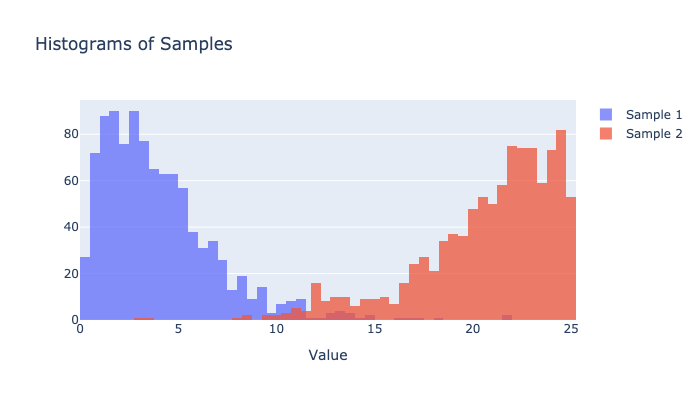

In [8]:
from scipy import stats
import pandas as pd
import plotly.graph_objects as go
import numpy as np

# Generate samples
sample1 = stats.gamma(a=2, scale=2).rvs(size=1000)
sample2 = stats.beta(a=5, b=1).rvs(size=1000) * 25

# Calculate statistics
stats_list = []
for sample in [sample1, sample2]:
    mean_value = sample.mean()
    median_value = np.quantile(sample, [0.5])[0]
    skewness_value = stats.skew(sample)
    stats_list.append((mean_value, median_value, skewness_value))

# Create histograms
fig = go.Figure()

# Add histograms to the figure without titles but with legend
fig.add_trace(go.Histogram(x=sample1, name='Sample 1', opacity=0.75))  # Empty name for Sample 1
fig.add_trace(go.Histogram(x=sample2, name='Sample 2', opacity=0.75))  # Empty name for Sample 2

# Create layout
fig.update_layout(
    barmode='overlay',
    title_text='Histograms of Samples',
    xaxis=dict(title='Value'),
    height=400
)

# Display statistics
for i, (mean, median, skew) in enumerate(stats_list):
    print(f"Sample {i+1}:\n\tMean: {mean}\n\tMedian: {median}\n\tSkewness: {skew}")

# Show combined figure
fig.show(renderer="png")

### 6. Go find an interesting dataset and use summary statistics and visualizations to understand and demonstate some interesting aspects of the data.

Hero Dataset Summary:
              Name  Intelligence  Strength   Speed  Durability   Power  \
count           52         52.00     52.00   52.00       52.00   52.00   
unique          52           NaN       NaN     NaN         NaN     NaN   
top     Abe Sapien           NaN       NaN     NaN         NaN     NaN   
freq             1           NaN       NaN     NaN         NaN     NaN   
mean           NaN         87.69     62.88   50.19       74.90   79.23   
std            NaN          8.71     34.79   24.83       24.36   23.83   
min            NaN         65.00     10.00   10.00       20.00   30.00   
25%            NaN         80.00     30.00   35.00       65.00   55.00   
50%            NaN         85.00     77.50   50.00       80.00   90.00   
75%            NaN         95.00     95.00   60.00      100.00  100.00   
max            NaN        100.00    100.00  100.00      100.00  100.00   

        Combat Alter Egos      Publisher Hero Status Gender    Race  \
count    52.00    

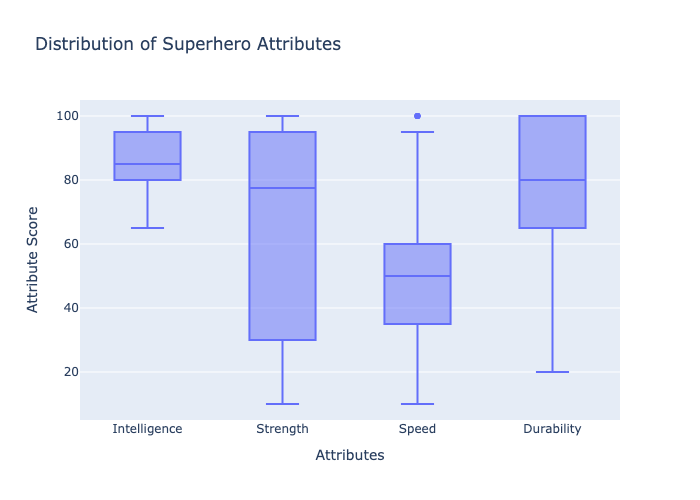

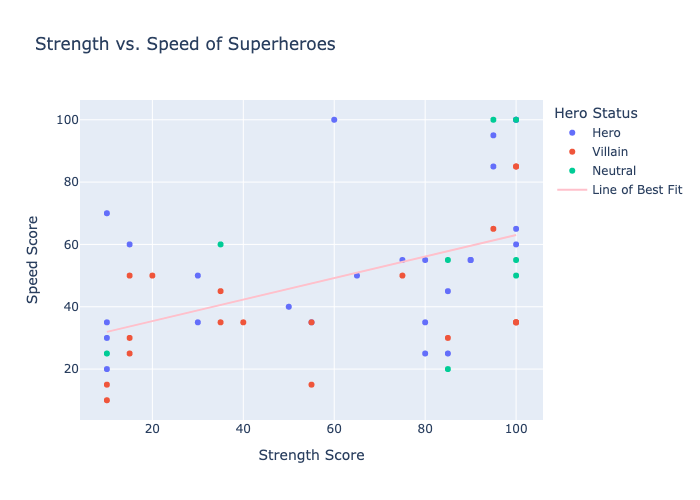

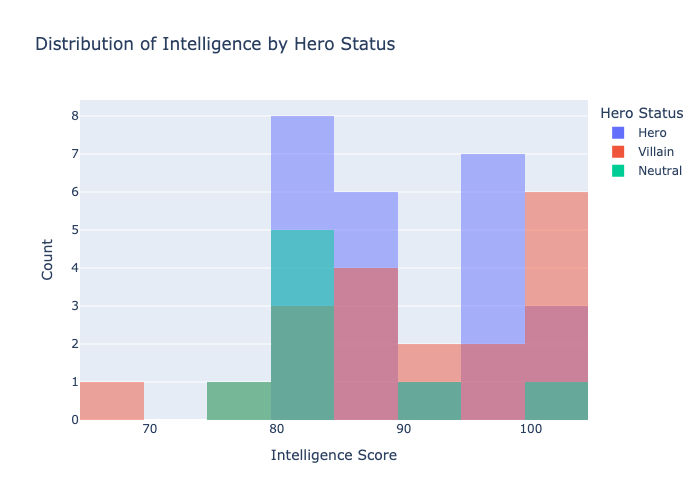

In [9]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

# Load the Superhero dataset
df = pd.read_csv("https://raw.githubusercontent.com/steview-d/superhero-dashboard/master/static/data/superheroData.csv")

# Rename the 'Alignment' column to 'Hero Status' and rename new values
df.rename(columns={'Alignment': 'Hero Status'}, inplace=True)
df['Hero Status'] = df['Hero Status'].replace({'good': 'Hero', 'bad': 'Villain', 'neutral': 'Neutral'})

# Change Weight and Height to use metric system only.
def to_metric(value):
	metric_value = float(value.split('//')[1][:-2])
	if metric_value <= 0:
		return np.nan
	return metric_value

df.rename(columns={'Weight': 'Weight (kg)'}, inplace=True)
df['Weight (kg)'] = df['Weight (kg)'].apply(to_metric)
df.rename(columns={'Height': 'Height (cm)'}, inplace=True)
df['Height (cm)'] = df['Height (cm)'].apply(to_metric)

df = df.dropna()

# Summary statistics
print("Hero Dataset Summary:")
print(df.describe(include="all").round(2))

# Box plot for some numeric features (e.g., Intelligence, Strength, Speed)
fig1 = px.box(df, y=['Intelligence', 'Strength', 'Speed', 'Durability'],
              title="Distribution of Superhero Attributes",
              labels={'value': 'Attribute Score', 'variable': 'Attributes'})

# Scatter plot to show the relationship between Strength and Speed
fig2 = px.scatter(df, x='Strength', y='Speed', color='Hero Status',
                  title="Strength vs. Speed of Superheroes",
                  labels={'Strength': 'Strength Score', 'Speed': 'Speed Score'},
                  hover_name='Name')

# Adding a line of best fit to fig2
# Calculate the line of best fit
x = df['Strength']
y = df['Speed']
slope, intercept = np.polyfit(x, y, 1)  # Linear regression

# Create the line of best fit data
line_x = np.array([x.min(), x.max()])
line_y = slope * line_x + intercept

# Add the line of best fit to the scatter plot
fig2.add_trace(go.Scatter(
    x=line_x,
    y=line_y,
    mode='lines',
    name='Line of Best Fit',
    line=dict(color='pink'),
    showlegend=True
))

# Histogram to show distribution of Intelligence by Hero Status
fig3 = px.histogram(df, x='Intelligence', color='Hero Status', 
                    title="Distribution of Intelligence by Hero Status",
                    labels={'Intelligence': 'Intelligence Score', 'count': 'Count'}, barmode='overlay')
fig3.update_layout(yaxis_title='Count')

# Show all figures
fig1.show(renderer="png")
fig2.show(renderer="png")
fig3.show(renderer="png")


### 7. Watch the classic [Gapminder Video](https://www.youtube.com/watch?v=jbkSRLYSojo), then have a look at the [`plotly` version](https://plotly.com/python/animations/) and recreate the animation (perhaps after optionally exploring and changing the [style](https://plotly.com/python/templates/), if you wish)

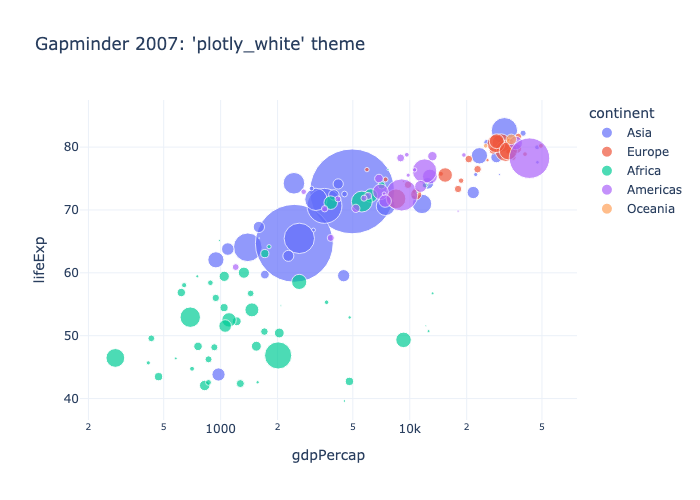

In [12]:
import plotly.express as px

df = px.data.gapminder()
df_2007 = df.query("year==2007")

fig = px.scatter(df_2007,
					x="gdpPercap", y="lifeExp", size="pop", color="continent",
					log_x=True, size_max=60,
					template="plotly_white", title=f"Gapminder 2007: 'plotly_white' theme")
fig.show(renderer="png")

### 8. Provide a second version of the figure from the previous problem where you edit the `fig = px.scatter()` function from the Gapminder code so that `x` is "percent change", `y` is "rank", `size` is "percent", and `color`="sex", `animation_frame` is "year", and `animation_group` and `hover_name` are "name". Then use `size_max=50`, `range_x=[-0.005,0.005])` and remove the `log_x=True` and `range_y` parameters.

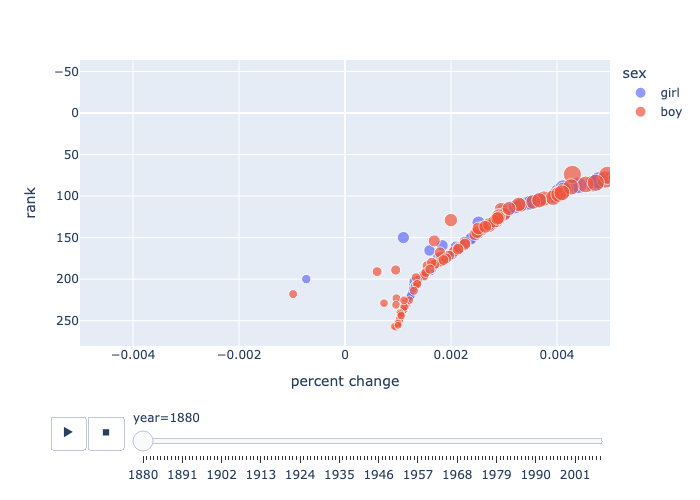

In [11]:
bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')

bn['name'] = bn['name']+" "+bn['sex'] # make identical boy and girl names distinct
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)
bn = bn.sort_values(['name','year'])

# The next three lines create the increases or decrease in name prevalence from the last year 

bn['percent change'] = bn['percent'].diff()
new_name = [True]+list(bn.name[:-1].values!=bn.name[1:].values)
bn.loc[new_name,'percentage change'] = bn.loc[new_name,'percent'] 
bn = bn.sort_values('year')
bn = bn[bn.percent>0.001] # restrict to "common" names

fig = px.scatter(bn, x="percent change", y="rank", animation_frame="year", animation_group="name",
                 size="percent", color="sex", hover_name="name",size_max=50, range_x=[-0.005,0.005]) # range_y removed
fig.update_yaxes(autorange='reversed') # this lets us put rank 1 on the top

fig.show(renderer="png")

### 9. Have you reviewed the course [wiki-textbook](https://github.com/pointOfive/stat130chat130/wiki) and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?

This week I haven't used the *wiki-textbook* much. However, I have used ChatGPT a lot to understand Kernel Density Estimations and the other topics discussed at the end of this week's lecture.